# LA City Crime Exploratory Data Analaysis

This notebook consists of Exploratory Data Analysis on a [Los Angeles crime dataset](https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data). 

The dataset, downloaded on 21.2.2025 and provided by the Los Angeles Police Department, consists of crime incidents in the city of Los Angeles from 2020 to present day. However, due to a system change in March 2024 resulting in post-2023 data accuracy issues, the dataset was filtered to only include crime incidents which occurred between 2020 and 2023. Between 2020 and 2023, a total of 877 319 crime incidents were recorded. 

The notebook is split into the following sections:

1. Importing libraries and dataset
2. Data familiarization
3. Data cleaning
4. Feature engineering
5. Data visualization

## 1. Importing libraries and dataset

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq

In [2]:
# read in data

df = pd.read_csv(r"/Users/jennajalava/Documents/Programming/lacity_crime_data_2020_to_present.csv")

In [3]:
# convert crime incident's date of occurence to datetime format

df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [4]:
# replace dataframe with version filtered based on occurence date <= 31.12.2023

df = df[df['DATE OCC'] <= '12/31/2023'].copy(deep=True)

In [5]:
#  check for unsuccessful conversions

df[df['DATE OCC'].isnull()]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON


## 2. Data familiarization

In [6]:
# display all 28 columns included in dataset

pd.set_option('display.max.columns', 28)

In [7]:
# examine first 10 rows of dataset 

df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
5,200209713,05/03/2020 12:00:00 AM,2020-05-02,1800,2,Rampart,245,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 W 4TH ST,NaN,34.0642,-118.2771
6,200200759,07/07/2020 12:00:00 AM,2020-07-07,1340,2,Rampart,265,1,648,ARSON,0329 1402 2004 1501,0,X,X,101.0,STREET,NaN,NaN,IC,Invest Cont,648.0,998.0,NaN,NaN,JAMES M WOOD,ALVARADO,34.0536,-118.2788
7,201308739,03/27/2020 12:00:00 AM,2020-03-27,1210,13,Newton,1333,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,3200 S SAN PEDRO ST,NaN,34.0170,-118.2643
8,201112065,07/31/2020 12:00:00 AM,2020-07-30,2030,11,Northeast,1161,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,NaN,NaN,NaN,KENMORE ST,FOUNTAIN,34.0953,-118.2974
9,200121929,12/04/2020 12:00:00 AM,2020-12-03,2300,1,Central,105,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,400 SOLANO AV,NaN,34.0710,-118.2302


In [8]:
# summary of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 877319 entries, 0 to 877318
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           877319 non-null  int64         
 1   Date Rptd       877319 non-null  object        
 2   DATE OCC        877319 non-null  datetime64[ns]
 3   TIME OCC        877319 non-null  int64         
 4   AREA            877319 non-null  int64         
 5   AREA NAME       877319 non-null  object        
 6   Rpt Dist No     877319 non-null  int64         
 7   Part 1-2        877319 non-null  int64         
 8   Crm Cd          877319 non-null  int64         
 9   Crm Cd Desc     877319 non-null  object        
 10  Mocodes         755714 non-null  object        
 11  Vict Age        877319 non-null  int64         
 12  Vict Sex        761886 non-null  object        
 13  Vict Descent    761878 non-null  object        
 14  Premis Cd       877309 non-null  float64 

In [9]:
# number of rows and columns

df.shape

(877319, 28)

In [10]:
# descriptive statistics

df.describe()

,DR_NO,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.773190e+05,877319,877319.000000,877319.000000,877319.000000,877319.000000,877319.000000,877319.000000,877309.000000,303423.000000,877308.000000,64074.000000,2176.000000,62.000000,877319.000000,877319.000000
mean,2.171837e+08,2022-01-26 04:16:23.160743680,1335.949997,10.708825,1117.323462,1.413142,500.648551,29.710819,306.946083,363.469490,500.390524,957.502794,983.761949,990.983871,33.986782,-118.052072
min,8.170000e+02,2020-01-01 00:00:00,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.103120e+08,2021-02-05 00:00:00,900.000000,6.000000,615.000000,1.000000,331.000000,3.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.014300,-118.429800
50%,2.203176e+08,2022-02-16 00:00:00,1415.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058600,-118.322100
75%,2.302129e+08,2023-01-20 00:00:00,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163800,-118.273900
max,2.519041e+08,2023-12-31 00:00:00,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000
std,1.125297e+07,NaN,653.046754,6.098712,609.883465,0.492398,207.590381,21.813940,217.093559,123.576869,207.380414,110.960289,52.587655,27.477259,1.723106,5.973658


## 3. Data cleaning

### Missing values

In [11]:
# get the number of missing data points per column

missing_values_by_column = df.isnull().sum()
missing_values_by_column

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           121605
Vict Age               0
Vict Sex          115433
Vict Descent      115441
Premis Cd             10
Premis Desc          533
Weapon Used Cd    573896
Weapon Desc       573896
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          813245
Crm Cd 3          875143
Crm Cd 4          877257
LOCATION               0
Cross Street      738832
LAT                    0
LON                    0
dtype: int64

In [12]:
# calculate percentage of missing values for dataset as a whole

total_number_of_cells = np.prod(df.shape)
total_number_of_missing_values = missing_values_by_column.sum()
missing_value_percentage = np.round((total_number_of_missing_values/total_number_of_cells) * 100, 2)
missing_value_percentage

19.56

In [13]:
# create dataframe for missing values and add number of missing values by field

missing_values = pd.DataFrame(missing_values_by_column, columns=['Nr of Missing Values'])
missing_values

,Nr of Missing Values
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


In [14]:
# add column for number of rows in dataset and calculate percentage of missing values for each field

missing_values.insert(1, 'Nr of Rows', df.shape[0])
missing_values.insert(2, 'Missing Percentage', (missing_values['Nr of Missing Values']/missing_values['Nr of Rows']*100).round(4))
missing_values

,Nr of Missing Values,Nr of Rows,Missing Percentage
DR_NO,0,877319,0.0000
Date Rptd,0,877319,0.0000
DATE OCC,0,877319,0.0000
TIME OCC,0,877319,0.0000
AREA,0,877319,0.0000
AREA NAME,0,877319,0.0000
Rpt Dist No,0,877319,0.0000
Part 1-2,0,877319,0.0000
Crm Cd,0,877319,0.0000
Crm Cd Desc,0,877319,0.0000


All in all, the dataset is quite complete as many columns contain no missing values whatsoever. 

Certain columns, such as 'Weapon Used Cd' and 'Crm Cd 2', will naturally not have any values, as a weapon was not used in every crime and some crimes do not have multiple crime codes. Therefore, the high values in these types of columns is not a reason for concern. 

A small number of rows (0.001 %) are missing 'Crm Cd 1', which can be considered key information. 'Vict Age' and 'Vict Sex' is missing in about 14 % of cases.

Let us have a closer look at the rows with missing values 'Crm Cd 1', as this is a key piece of information.

In [15]:
# examine rows where 'Crm Cd 1' is null
# crimecd1_null_values

df[df['Crm Cd 1'].isnull()]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
5790,200112035,05/21/2020 12:00:00 AM,2020-05-21,525,1,Central,163,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329 0910 0447,0,NaN,NaN,801.0,MTA BUS,306.0,ROCK/THROWN OBJECT,IC,Invest Cont,NaN,740.0,NaN,NaN,9TH,SPRING,34.0420,-118.2555
47731,200116522,08/17/2020 12:00:00 AM,2020-08-17,545,1,Central,176,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 2004 1601,0,X,X,203.0,OTHER BUSINESS,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,NaN,745.0,NaN,NaN,800 SANTEE ST,NaN,34.0401,-118.2533
236995,211016055,12/26/2021 12:00:00 AM,2021-12-25,2000,10,West Valley,1023,1,520,VEHICLE - ATTEMPT STOLEN,1822 1300,59,M,O,101.0,STREET,NaN,NaN,IC,Invest Cont,NaN,520.0,NaN,NaN,ARCHWOOD ST,WILBUR AV,34.1921,-118.5447
350431,210118616,10/13/2021 12:00:00 AM,2021-10-13,1840,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),2004 0325,0,X,X,404.0,DEPARTMENT STORE,NaN,NaN,IC,Invest Cont,NaN,442.0,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577
432359,221701255,12/08/2022 12:00:00 AM,2022-12-08,2138,17,Devonshire,1799,2,890,FAILURE TO YIELD,1300 1501,0,X,X,101.0,STREET,NaN,NaN,IC,Invest Cont,NaN,890.0,NaN,NaN,AQUEDUCT AV,NORDHOFF ST,34.2249,-118.4792
495772,220509912,06/06/2022 12:00:00 AM,2022-06-06,2000,5,Harbor,526,2,888,TRESPASSING,2004 0561,42,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,NaN,888.0,NaN,NaN,900 N FRIES AV,NaN,33.7815,-118.2650
508450,220805565,02/09/2022 12:00:00 AM,2022-02-09,245,8,West LA,842,2,888,TRESPASSING,1501,21,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,NaN,888.0,NaN,NaN,11700 WILSHIRE BL,NaN,34.0495,-118.4609
694453,230114704,06/22/2023 12:00:00 AM,2023-06-22,1801,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325,25,M,H,404.0,DEPARTMENT STORE,NaN,NaN,IC,Invest Cont,NaN,442.0,NaN,NaN,700 S FLOWER ST,NaN,34.0487,-118.2588
705385,230123939,11/13/2023 12:00:00 AM,2023-11-12,2300,1,Central,162,1,330,BURGLARY FROM VEHICLE,0344 1307,47,M,B,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont,NaN,330.0,NaN,NaN,800 S HILL ST,NaN,34.0462,-118.2585
801489,230106125,02/01/2023 12:00:00 AM,2023-02-01,1855,1,Central,129,1,330,BURGLARY FROM VEHICLE,0344 1609,32,M,B,101.0,STREET,NaN,NaN,IC,Invest Cont,NaN,330.0,NaN,NaN,GAREY,JACKSON,34.0513,-118.2344


From the data documentation, both 'Crm Cd' and 'Crm Cd 1' indicated the crime committed, where 'Crm Cd 1' denotes the primary crime in case of multiple offences. Looking at the table above, it looks like the values which were supposed to be in 'Crm Cd 1', were accidentally added to 'Crm Cd 2' instead and thereby it appears feasible to fill in the missing values in 'Crm Cd 1' using 'Crm Cd' or 'Crm Cd 2'. There are 11 entries which are missing 'Crm Cd 1' values in this dataset.

In [16]:
# make copy of dataframe using only selected columns

df_copy = df[['Crm Cd Desc', 'Crm Cd', 'Crm Cd 1', 'Crm Cd 2']].copy(deep=True)
df_copy[df_copy['Crm Cd 1'].isnull()]

,Crm Cd Desc,Crm Cd,Crm Cd 1,Crm Cd 2
5790,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",740,NaN,740.0
47731,VANDALISM - MISDEAMEANOR ($399 OR UNDER),745,NaN,745.0
236995,VEHICLE - ATTEMPT STOLEN,520,NaN,520.0
350431,SHOPLIFTING - PETTY THEFT ($950 & UNDER),442,NaN,442.0
432359,FAILURE TO YIELD,890,NaN,890.0
495772,TRESPASSING,888,NaN,888.0
508450,TRESPASSING,888,NaN,888.0
694453,SHOPLIFTING - PETTY THEFT ($950 & UNDER),442,NaN,442.0
705385,BURGLARY FROM VEHICLE,330,NaN,330.0
801489,BURGLARY FROM VEHICLE,330,NaN,330.0


In [17]:
# check the number of missing data points in 'Crm Cd 1' BEFORE replacing missing values

df['Crm Cd 1'].isnull().sum()

11

In [18]:
# fill in missing 'Crm Cd 1' values using 'Crm Cd 2' column

df['Crm Cd 1'] = df['Crm Cd 1'].fillna(df['Crm Cd 2'])

In [19]:
# check the number of missing data points in 'Crm Cd 1' AFTER replacing missing values

df['Crm Cd 1'].isnull().sum()

0

## 4. Feature engineering

### Month and year of occurrence

In [20]:
# create new columns 'Month Occ' (month crime occurred) and 'Year Occ' (year crime occured) based on the crime's date of occurrence
# 'DATE OCC' was previously converted into datetime format

df['Month Occ'] = df['DATE OCC'].dt.month
df['Year Occ'] = df['DATE OCC'].dt.year

In [21]:
# check new columns are accurate

df[['DATE OCC', 'Month Occ', 'Year Occ']]

,DATE OCC,Month Occ,Year Occ
0,2020-03-01,3,2020
1,2020-02-08,2,2020
2,2020-11-04,11,2020
3,2020-03-10,3,2020
4,2020-09-09,9,2020
...,...,...,...
877314,2023-03-22,3,2023
877315,2023-09-25,9,2023
877316,2023-07-01,7,2023
877317,2023-03-05,3,2023


### Crime category

In [22]:
# examine all crime descriptions

sorted(df['Crm Cd Desc'].unique())

['ARSON',
 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 'ATTEMPTED ROBBERY',
 'BATTERY - SIMPLE ASSAULT',
 'BATTERY ON A FIREFIGHTER',
 'BATTERY POLICE (SIMPLE)',
 'BATTERY WITH SEXUAL CONTACT',
 'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
 'BIGAMY',
 'BIKE - ATTEMPTED STOLEN',
 'BIKE - STOLEN',
 'BLOCKING DOOR INDUCTION CENTER',
 'BOAT - STOLEN',
 'BOMB SCARE',
 'BRANDISH WEAPON',
 'BRIBERY',
 'BUNCO, ATTEMPT',
 'BUNCO, GRAND THEFT',
 'BUNCO, PETTY THEFT',
 'BURGLARY',
 'BURGLARY FROM VEHICLE',
 'BURGLARY FROM VEHICLE, ATTEMPTED',
 'BURGLARY, ATTEMPTED',
 'CHILD ABANDONMENT',
 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
 'CHILD ANNOYING (17YRS & UNDER)',
 'CHILD NEGLECT (SEE 300 W.I.C.)',
 'CHILD PORNOGRAPHY',
 'CHILD STEALING',
 'CONSPIRACY',
 'CONTEMPT OF COURT',
 'CONTRIBUTING',
 'COUNTERFEIT',
 'CREDIT CARDS, FRAUD USE ($950 & UNDER',
 'CREDIT CARDS, FRAUD USE ($95

In [23]:
# create function that categories crime incidents into broader categories based on 'Crm Cd Desc'

def categorize_crime(crime_desc):
    if 'ARSON' in crime_desc:
        return 'Arson'
    elif 'BURGLARY' in crime_desc:
        return 'Burglary'
    elif any(word in crime_desc for word in ['ROBBERY', 'PURSE SNATCHING','PICKPOCKET']):
        return 'Robbery'
    elif any(word in crime_desc for word in ['FIREARMS', 'WEAPON','SHOTS']):
        return 'Arms & weapons'
    elif any(word in crime_desc for word in ['VEHICLE', 'BIKE','BOAT']):
        return 'Vehicle theft'
    elif any(word in crime_desc for word in ['FRAUD', 'BUNCO', 'EMBEZZLEMENT', 'DOCUMENT', 'CONSPIRACY', 'COUNTERFEIT']):
        return 'Fraud & embezzlement'
    elif any(word in crime_desc for word in ['HUMAN TRAFFICKING', 'PIMPING','PANDERING']):
        return 'Human trafficking'
    elif any(word in crime_desc for word in ['HOMICIDE', 'MANSLAUGHTER']):
        return 'Homicide'
    elif any(word in crime_desc for word in ['THEFT', 'SHOPLIFTING', 'TILL TAP', 'DRUNK ROLL']):
        return 'Theft'
    elif 'KIDNAPPING' in crime_desc or 'CHILD STEALING' in crime_desc:
        return 'Kidnapping'
    elif 'VANDALISM' in crime_desc or 'TELEPHONE PROPERTY' in crime_desc:
        return 'Vandalism'
    elif 'EXTORTION' in crime_desc or 'BRIBERY' in crime_desc:
        return 'Extortion and bribery'
    elif 'ANIMALS' in crime_desc:
        return 'Animal cruelty'
    elif 'TRESPASSING' in crime_desc or 'PROWLER' in crime_desc:
        return 'Trespassing'
    elif 'CONTEMPT' in crime_desc or 'VIOLATION' in crime_desc or 'FALSE' in crime_desc:
        return 'Legal violations'
    elif 'THREAT' in crime_desc or 'STALKING' in crime_desc:
        return 'Threats and harassment'
    elif 'BATTERY' in crime_desc:
        return 'Battery'
    elif any(word in crime_desc for word in ['RAPE', 'SEX', 'SEXUAL', 'SODOMY', 'LEWD', 'ORAL', 'INCEST', 'PORNOGRAPHY', 'PEEPING', 'INDECENT EXPOSURE']):
        return 'Sexual offences'
    elif any(word in crime_desc for word in ['ASSAULT', 'LYNCHING', 'RESISTING ARREST']):
        return 'Assault'
    elif any(word in crime_desc for word in ['CHILD', 'CHLD']):
        return 'Crimes against children'
    elif any(word in crime_desc for word in ['DRIVING', 'FAILURE TO YIELD']):
        return 'Traffic offences'
    elif any(word in crime_desc for word in ['DISTURBING', 'INCITING', 'DISRUPT', 'BLOCKING', 'DISPERSE']):
        return 'Public disturbance'
    else:
        return 'Other'

In [24]:
# apply the function to create a new column

df['Crime_Category'] = df['Crm Cd Desc'].apply(categorize_crime)

In [25]:
# check that crimes were correctly classified

df[['Crm Cd Desc', 'Crime_Category']].head(100)

,Crm Cd Desc,Crime_Category
0,VEHICLE - STOLEN,Vehicle theft
1,BURGLARY FROM VEHICLE,Burglary
2,BIKE - STOLEN,Vehicle theft
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),Theft
4,VEHICLE - STOLEN,Vehicle theft
...,...,...
95,THEFT OF IDENTITY,Theft
96,VEHICLE - STOLEN,Vehicle theft
97,BURGLARY FROM VEHICLE,Burglary
98,BURGLARY FROM VEHICLE,Burglary


In [26]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,...,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Month Occ,Year Occ,Crime_Category
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,...,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,3,2020,Vehicle theft
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,...,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2,2020,Burglary
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,...,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,11,2020,Vehicle theft
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,...,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,3,2020,Theft
4,200412582,09/09/2020 12:00:00 AM,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,9,2020,Vehicle theft


In [27]:
# check number of crime incidents per category

df['Crime_Category'].value_counts()

Crime_Category
Vehicle theft              172811
Theft                      161221
Burglary                   111700
Arms & weapons              86932
Vandalism                   76133
Battery                     75918
Assault                     64378
Robbery                     36914
Legal violations            20862
Sexual offences             18144
Fraud & embezzlement        15644
Trespassing                 13034
Other                        7347
Crimes against children      3798
Arson                        2401
Extortion and bribery        1889
Traffic offences             1779
Homicide                     1481
Public disturbance           1456
Kidnapping                   1373
Threats and harassment       1089
Human trafficking             768
Animal cruelty                247
Name: count, dtype: int64

In [28]:
# make another version that combines smaller categories
# count crimes per category

crime_counts = df['Crime_Category'].value_counts()


# define a threshold (categories with < 2% of total crimes)

threshold = 0.02 * crime_counts.sum()


# replace small categories with "Other"

df['Crime_Category_Grouped'] = df['Crime_Category'].apply(lambda x: x if crime_counts[x] >= threshold else 'Other')
grouped_counts = df['Crime_Category_Grouped'].value_counts()

In [29]:
# check number of crime incidents per category

df['Crime_Category_Grouped'].value_counts()

Crime_Category_Grouped
Vehicle theft       172811
Theft               161221
Burglary            111700
Arms & weapons       86932
Vandalism            76133
Battery              75918
Assault              64378
Other                52306
Robbery              36914
Legal violations     20862
Sexual offences      18144
Name: count, dtype: int64

## 5. Data visualization

### Correlations

In [30]:
# examine correlations

df.corr(numeric_only = True)

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON,Month Occ,Year Occ
DR_NO,1.000000,-0.016195,0.043647,0.043971,0.002622,-0.025209,-0.014672,0.047544,0.013135,-0.025155,0.022198,0.025787,0.144900,0.043967,-0.042847,0.028024,0.974665
TIME OCC,-0.016195,1.000000,-0.000201,-0.000098,-0.053869,0.015802,-0.034768,-0.062782,-0.005441,0.015810,0.007291,-0.003021,-0.027721,0.002850,-0.002633,0.002631,-0.010067
AREA,0.043647,-0.000201,1.000000,0.999048,0.010426,-0.000327,0.017396,0.001943,-0.017999,-0.000523,-0.035669,0.030424,0.161110,0.023827,-0.010154,-0.005061,-0.013686
Rpt Dist No,0.043971,-0.000098,0.999048,1.000000,0.010309,-0.000389,0.017357,0.001866,-0.017632,-0.000585,-0.036034,0.029922,0.162099,0.023577,-0.010072,-0.004992,-0.013305
Part 1-2,0.002622,-0.053869,0.010426,0.010309,1.000000,0.698394,0.198752,0.270292,0.431426,0.698920,0.073576,0.006451,0.107761,-0.029238,0.029749,-0.014097,-0.012572
Crm Cd,-0.025209,0.015802,-0.000327,-0.000389,0.698394,1.000000,-0.012675,0.105412,0.368807,0.999298,-0.001912,0.122546,0.037656,-0.041228,0.041351,-0.006332,-0.023110
Vict Age,-0.014672,-0.034768,0.017396,0.017357,0.198752,-0.012675,1.000000,0.189877,0.081486,-0.012597,-0.019292,-0.006617,-0.007633,0.000566,0.000805,-0.010653,-0.020594
Premis Cd,0.047544,-0.062782,0.001943,0.001866,0.270292,0.105412,0.189877,1.000000,0.207027,0.105359,-0.056194,-0.019030,0.008583,-0.006464,0.007701,-0.009523,0.031272
Weapon Used Cd,0.013135,-0.005441,-0.017999,-0.017632,0.431426,0.368807,0.081486,0.207027,1.000000,0.369708,-0.146192,-0.065745,0.033097,-0.009751,0.012209,-0.008702,0.008868
Crm Cd 1,-0.025155,0.015810,-0.000523,-0.000585,0.698920,0.999298,-0.012597,0.105359,0.369708,1.000000,0.019448,0.166838,-0.033938,-0.041294,0.041411,-0.006322,-0.023056


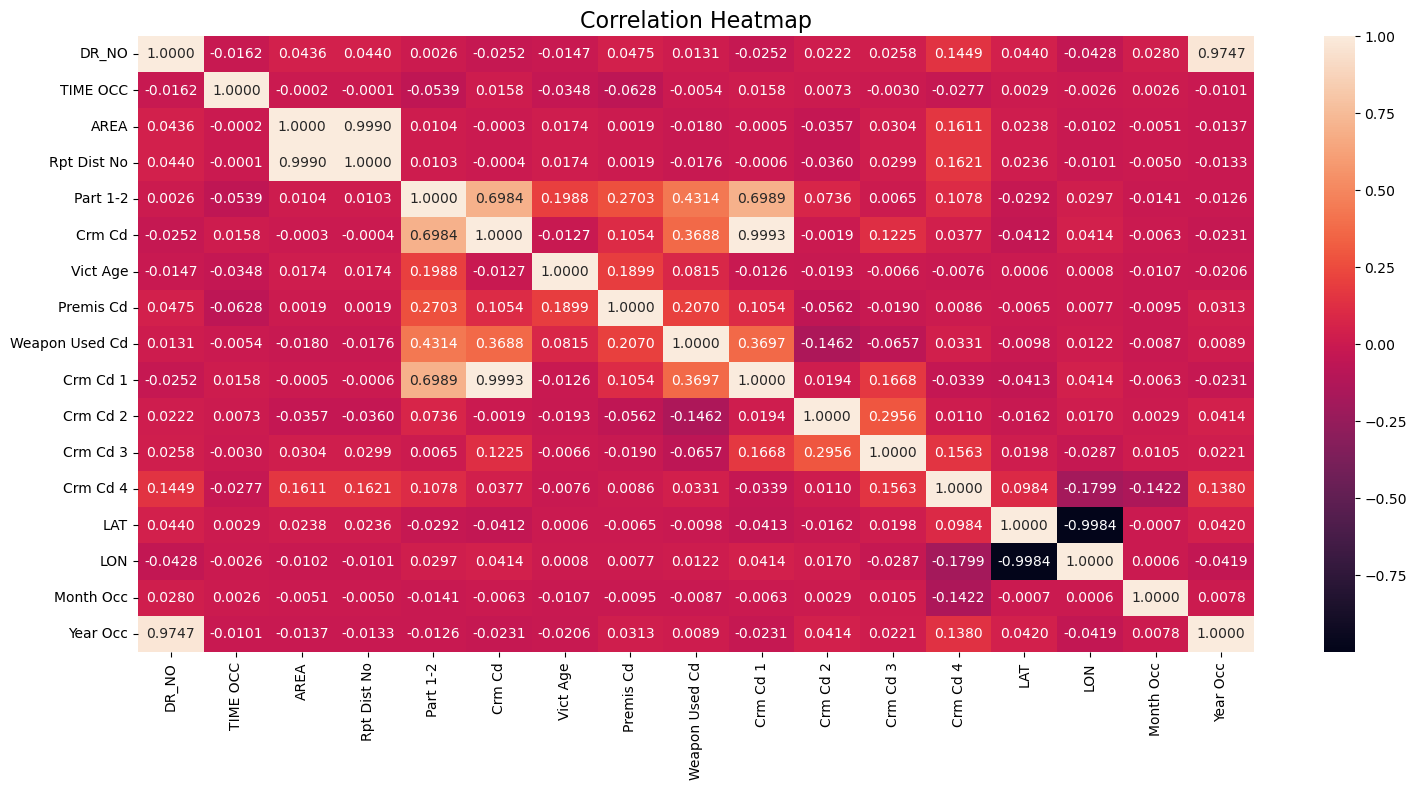

In [31]:
# plot correlations using heatmap

plt.rcParams['figure.figsize'] = (18,8)

sns.heatmap(
    df.corr(numeric_only = True), 
    annot=True,
    fmt='.4f',                          
    annot_kws={'size': 10})

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Strong correlations exist between crime classification fields, confirming their interdependencies. 

- 'Rpt Dist No' and 'AREA' are strongly correlated, which is expected as 'Rpt Dist No' is the sub-area of 'AREA'.
- 'Crm Cd' and 'Crm Cd 1', 'Crm Cd' indicates the crime committed and 'Crm Cd 1' is the primary and most serious one, so it follows that these are strongly correlated.
- 'Part 1-2' relates to crime classification (part I offenses include: homicide, rape, robbery, aggravated assault, burglary,larceny-theft, arson and human trafficking, and part II other offenses that falloutside part I offenses), making it natural for this column to be strongly correlated to 'Crm Cd' and 'Crm Cd 1'.
- The strong correlation between 'Weapons Used Cd' and 'Part 1-2' can be attributed to the fact that part I offenses are more serious and more often include weapons compared to part II offenses.
- As 'DR_NO' (Division of Records Number) is based on year, it is not surprising that it is strongly correlated with 'Year Occ'

### Number of crime incidents by month, year and category

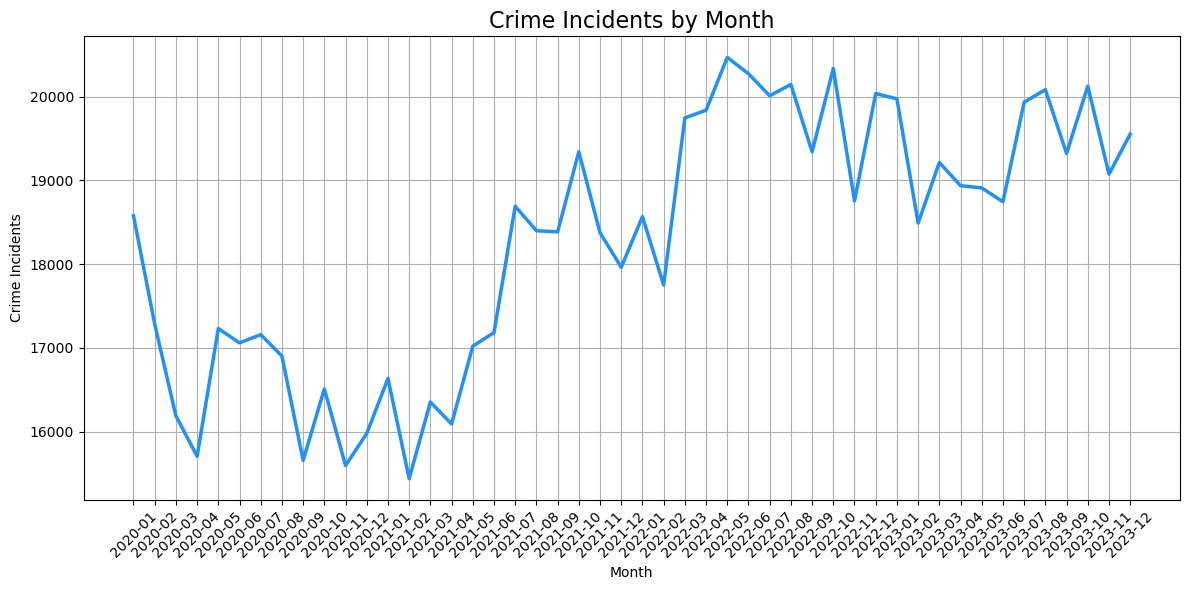

In [32]:
# create new column 'Year-Month' and convert year and month to datetime format

df['Year-Month'] = pd.to_datetime(df[['Year Occ', 'Month Occ']].rename(columns={'Year Occ': 'year', 'Month Occ': 'month'}).assign(day=1))


# group by this new datetime column

crime_occ_by_month = df.groupby('Year-Month').size().reset_index(name='Crime Occurences')


# convert datetime to string format YYYY-MM

crime_occ_by_month['Year-Month'] = crime_occ_by_month['Year-Month'].dt.strftime('%Y-%m')


# plot line chart based on number of crime incidents per month

plt.figure(figsize=(12, 6), dpi=100)

sns.lineplot(
    data=crime_occ_by_month, 
    x='Year-Month', 
    y='Crime Occurences',  
    linewidth=2.5,
    color='dodgerblue')

plt.title('Crime Incidents by Month', fontsize=16)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Crime Incidents', fontsize=10)
plt.xticks(crime_occ_by_month['Year-Month'], rotation=45)
plt.grid(True, linestyle='-')
plt.tight_layout()
plt.show()

From beginning of 2021 to beginning of 2022, there was a sharp increase in the number of crime incidents by month. It would be interesting delve deeper into the cause of this, for example, if there was some legislative changes or changes related to crime reporting practices that took place here.

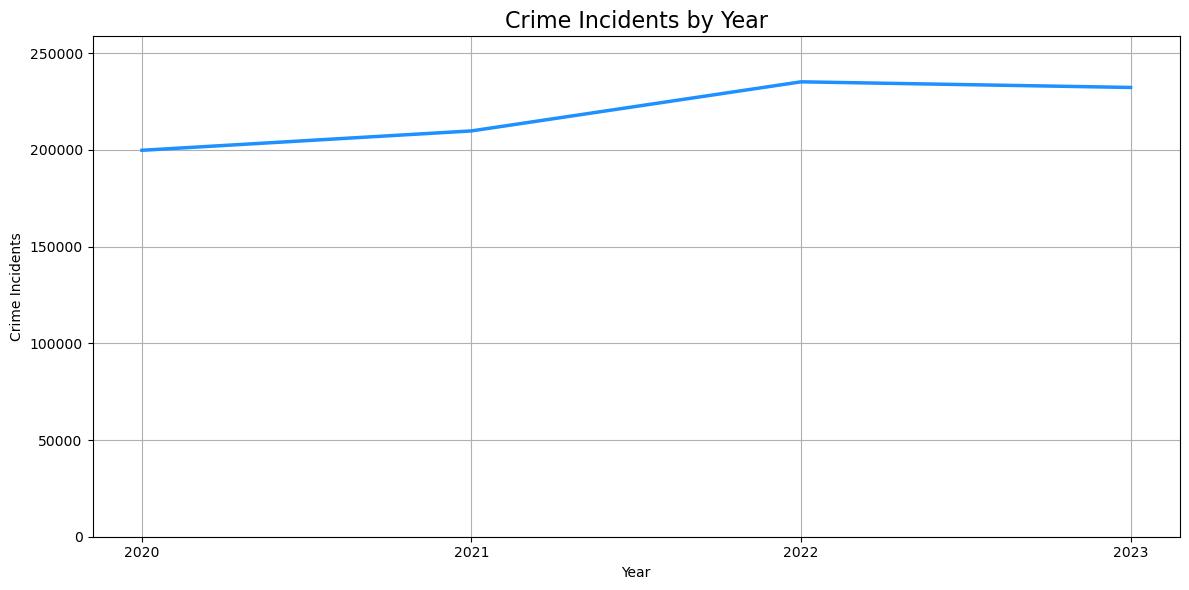

In [33]:
# group by new datetime column

crime_occ_by_year = df.groupby('Year Occ').size().reset_index(name='Crime Occurences')


# plot line chart based on number of crime incidents per month

plt.figure(figsize=(12, 6), dpi=100)

sns.lineplot(
    data=crime_occ_by_year, 
    x='Year Occ', 
    y='Crime Occurences',  
    linewidth=2.5,
    color='dodgerblue')

plt.title('Crime Incidents by Year', fontsize=16)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Crime Incidents', fontsize=10)
plt.xticks(crime_occ_by_year['Year Occ'])
plt.ylim(0, crime_occ_by_year['Crime Occurences'].max() * 1.1)
plt.grid(True, linestyle='-')
plt.tight_layout()
plt.show()

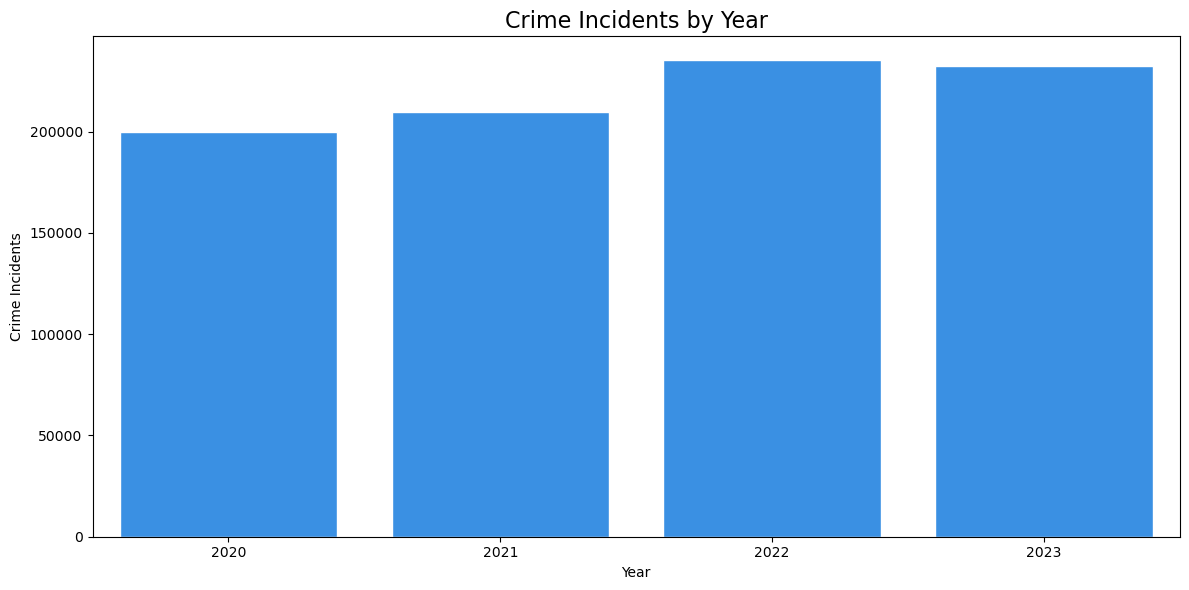

In [34]:
# group data by year

crime_occ_by_year = df.groupby('Year Occ').size().reset_index(name='Crime Occurences')


# plot bar chart

plt.figure(figsize=(12, 6), dpi=100)

sns.barplot(
    data=crime_occ_by_year, 
    x='Year Occ', 
    y='Crime Occurences',
    color='dodgerblue',
    edgecolor='white'
)

plt.title('Crime Incidents by Year', fontsize=16)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Crime Incidents', fontsize=10)
plt.tight_layout()
plt.show()

From 2020 to 2022, and especially between 2021 and 2022, we can see an increase in crime incidents, but between 2022 and 2023, the number of crime incidents stabilized.

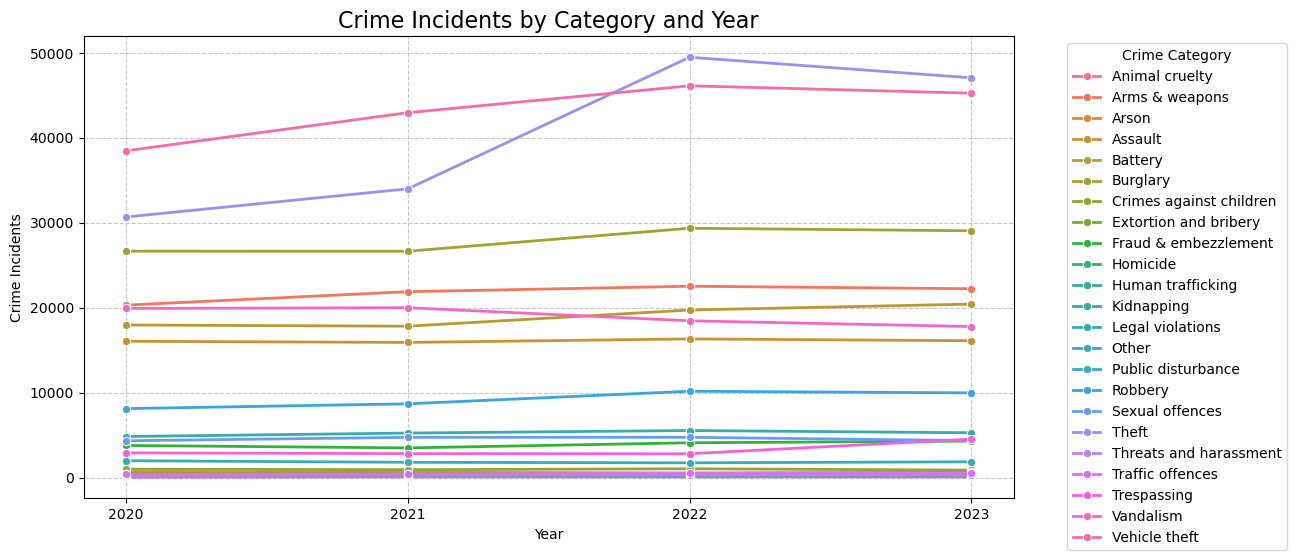

In [35]:
# convert year to numeric

df['Year Occ'] = pd.to_numeric(df['Year Occ'], errors='coerce')


# group data by year and crime category

crime_trend = df.groupby(['Year Occ', 'Crime_Category']).size().reset_index(name='Crime Occurrences')


# plot line chart based on number of crime incidents by category and year

plt.figure(figsize=(12, 6), dpi=100)

sns.lineplot(
    data=crime_trend, 
    x='Year Occ', 
    y='Crime Occurrences', 
    hue='Crime_Category', 
    marker='o', 
    linewidth=2
)

plt.title('Crime Incidents by Category and Year', fontsize=16)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Crime Incidents', fontsize=10)
plt.xticks([2020, 2021, 2022, 2023], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Crime Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

While we do not see major changes in most crime categories year by year, thefts dramatically increased between 2021 and 2022. Vehicle theft also increased significantly from 2020 to 2022.

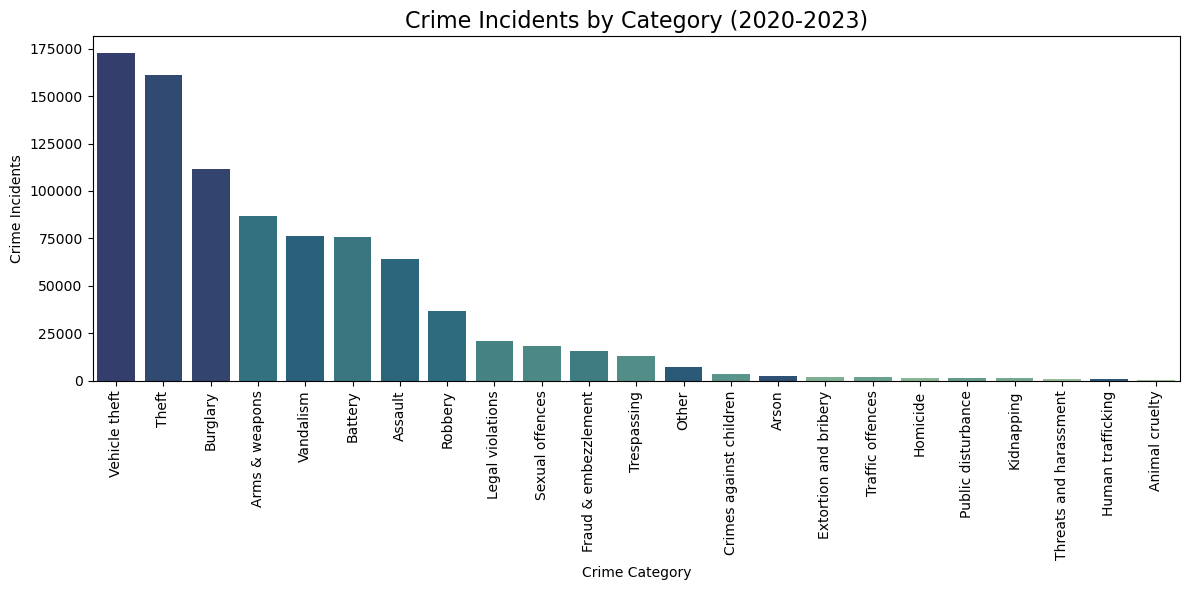

In [36]:
# plot crime incidents by cateogry in descending order

plt.figure(figsize=(12, 6), dpi=100)

num_categories = df['Crime_Category'].nunique()
palette = sns.color_palette("crest", num_categories)[::-1]

sns.countplot(
    data=df, 
    x='Crime_Category', 
    order=df['Crime_Category'].value_counts().index,
    hue='Crime_Category',
    palette=palette)

plt.title('Crime Incidents by Category (2020-2023)', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Crime Category', fontsize=10)
plt.ylabel('Crime Incidents', fontsize=10)
plt.tight_layout()
plt.show()

Here we can see the number of crime incidents by category and in order. The vast majority of crimes recorded are some form of theft (vehicle theft, theft and burglary).

### Treemap of crime incidents by category

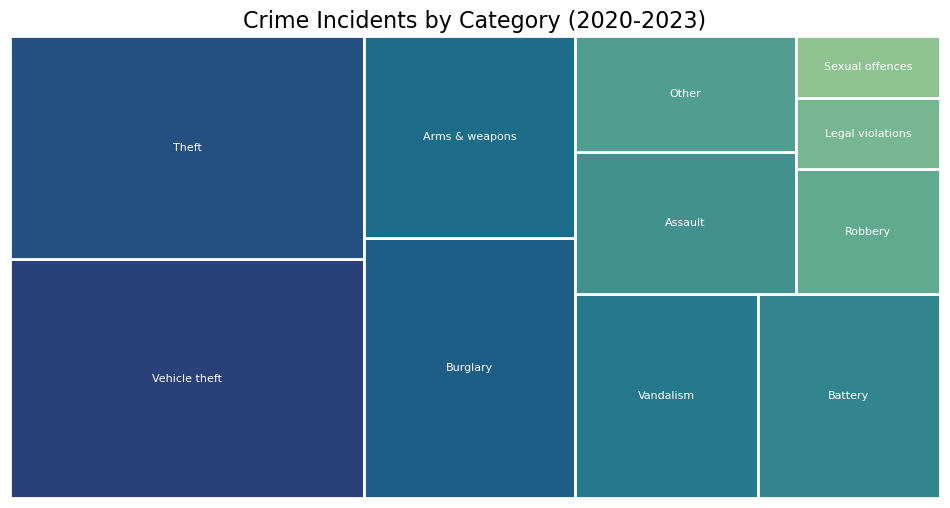

In [37]:
# plot treemap based on crime categories

fig, ax = plt.subplots(figsize=(12, 6), dpi=100)

width, height = 10, 6
normed_sizes = sq.normalize_sizes(grouped_counts, width, height)
rects = sq.squarify(normed_sizes, 0, 0, width, height)

colors = reversed(sns.color_palette("crest", len(grouped_counts)))

for rect, color, label in zip(rects, colors, grouped_counts.index):
    ax.add_patch(
        plt.Rectangle(
            (rect['x'], rect['y']), rect['dx'], rect['dy'],
            facecolor=color, edgecolor='white', linewidth=2
        )
    )
    ax.text(
        rect['x'] + rect['dx'] / 2, rect['y'] + rect['dy'] / 2,
        label, ha='center', va='center', fontsize=8, color='white'
    )

ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.title("Crime Incidents by Category (2020-2023)", fontsize=16)
plt.show()

Another way to visualize the number of crime incidents by category. The vast majority of crimes recorded are some form of theft (vehicle theft, theft and burglary). Smaller categories have been grouped together under 'Other'.

### Crime incidents by area and year

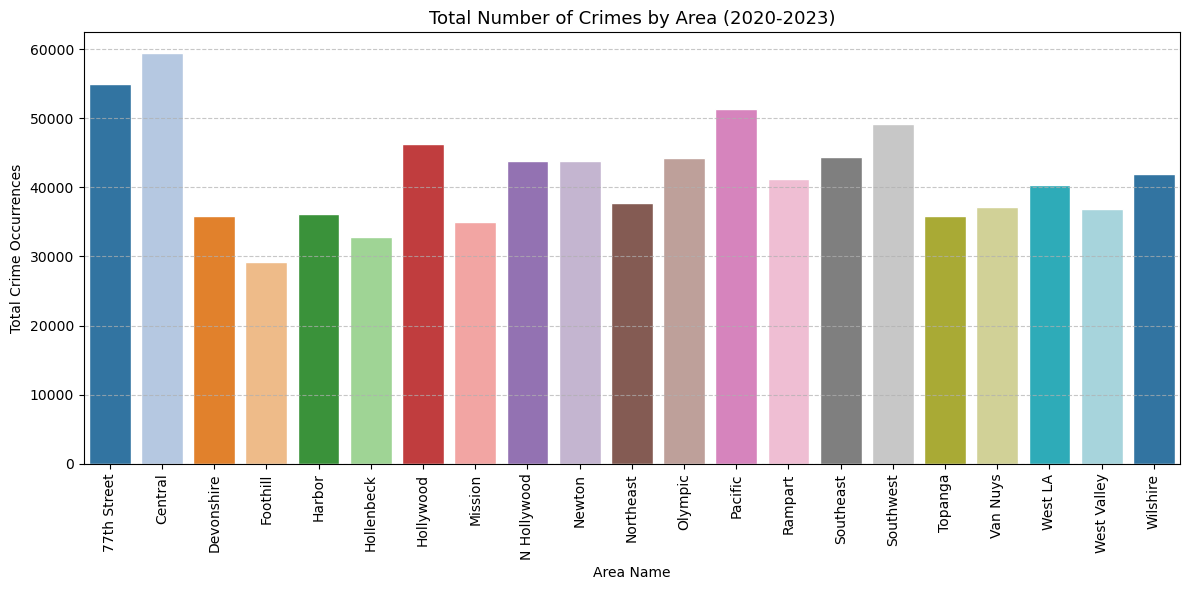

In [38]:
# group data by area

crime_occ_by_area = (
    df.groupby('AREA NAME')
      .size()
      .reset_index(name='Crime Occurrences')
)


# plot a single bar chart based on area

plt.figure(figsize=(12, 6), dpi=100)

sns.barplot(
    data=crime_occ_by_area, 
    x='AREA NAME', 
    y='Crime Occurrences',
    hue='AREA NAME', 
    palette='tab20', 
    edgecolor='white',
    legend=False 
)

plt.title('Total Number of Crimes by Area (2020-2023)', fontsize=13)
plt.xlabel('Area Name', fontsize=10)
plt.ylabel('Total Crime Occurrences', fontsize=10)
plt.xticks(rotation=90)  # Rotate for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

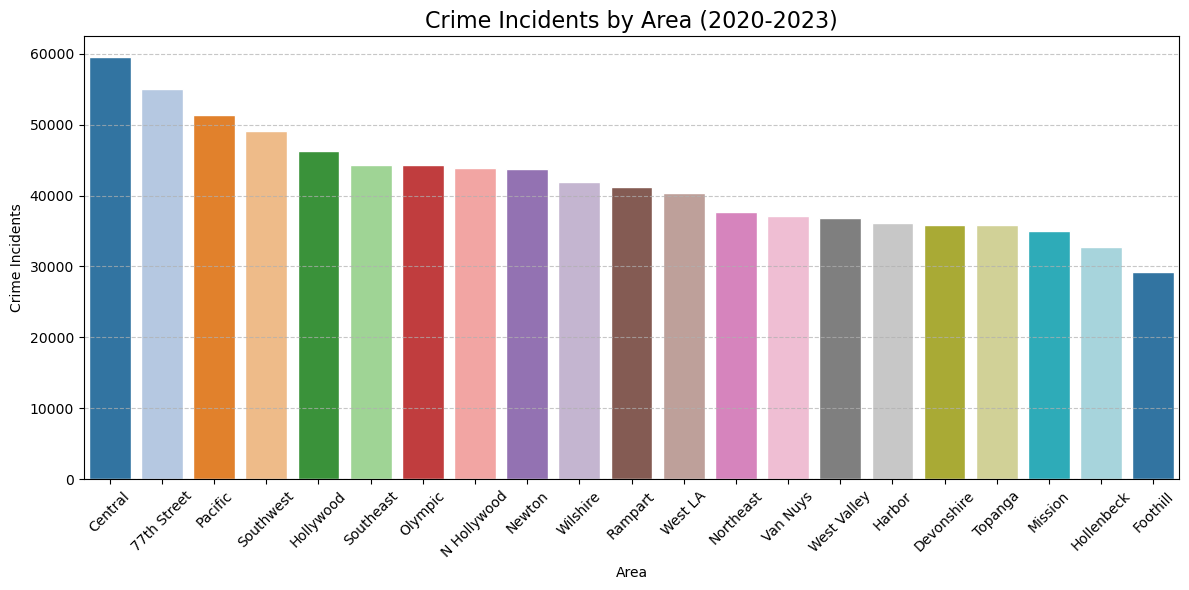

In [39]:
# group data by area

crime_occ_by_area = (
    df.groupby('AREA NAME')
      .size()
      .reset_index(name='Crime Occurrences')
)


# sort in descending order

crime_occ_by_area = crime_occ_by_area.sort_values(by='Crime Occurrences', ascending=False)


# plot a single bar chart based on area

plt.figure(figsize=(12, 6), dpi=100)

sns.barplot(
    data=crime_occ_by_area, 
    x='AREA NAME', 
    y='Crime Occurrences',
    hue='AREA NAME', 
    palette='tab20', 
    edgecolor='white',
    legend=False 
)

plt.title('Crime Incidents by Area (2020-2023)', fontsize=16)
plt.xlabel('Area', fontsize=10)
plt.ylabel('Crime Incidents', fontsize=10)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

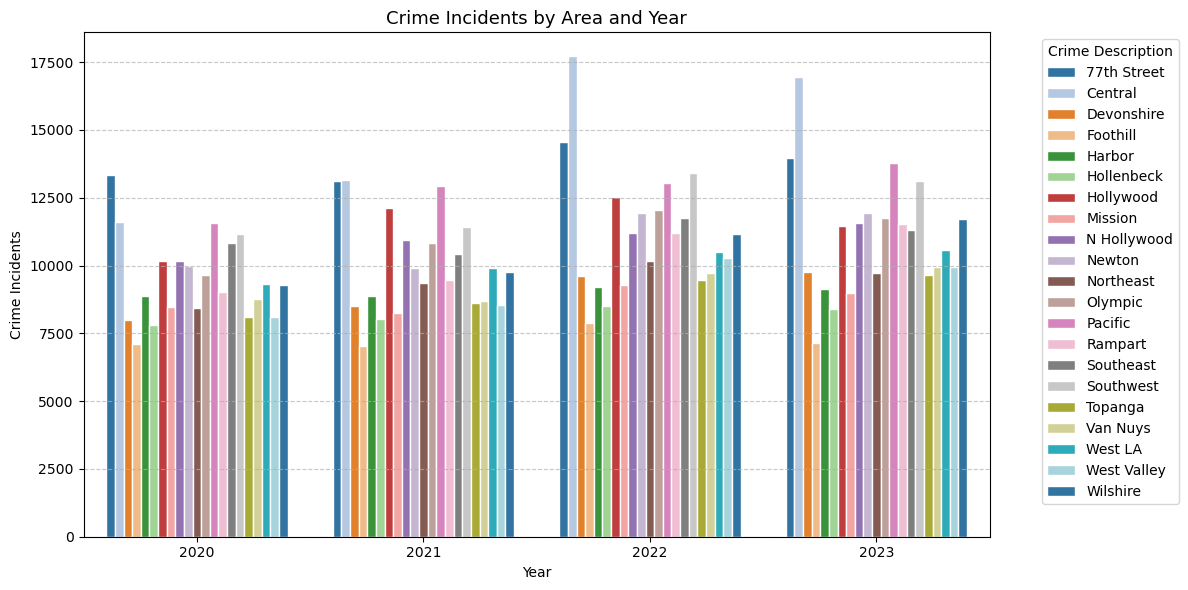

In [40]:
# group data by area and year

crime_occ_by_year_and_area = (
    df.groupby(['Year Occ', 'AREA NAME'])
      .size()
      .reset_index(name='Crime Occurences')
)


# plot bar char based on area and year

plt.figure(figsize=(12, 6), dpi=100)

sns.barplot(
    data=crime_occ_by_year_and_area, 
    x='Year Occ', 
    y='Crime Occurences',
    hue='AREA NAME',
    palette='tab20',
    edgecolor='white' 
)

plt.title('Crime Incidents by Area and Year', fontsize=13)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Crime Incidents', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.legend(title='Crime Description', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

From examining the number of crime incidents and the areas they occurred in, we can see that certain areas stand out, such as Central and 77th Street. The year by year breakdown shows that especially in 2022 and 2023, there was a significant increase in crimes in Central.

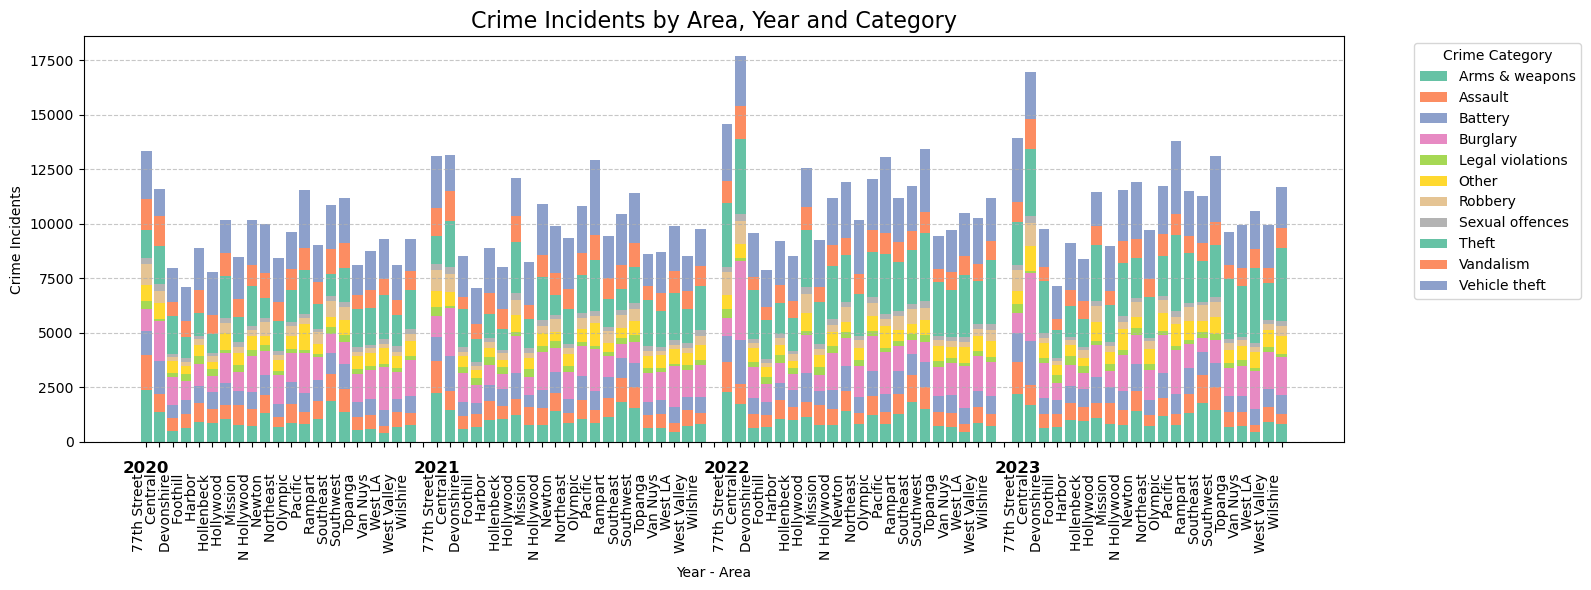

In [47]:
# create pivot table

pivot_df = df.groupby(["Year Occ", "AREA NAME", "Crime_Category_Grouped"]).size().unstack(fill_value=0)


# plot figure

plt.figure(figsize=(16, 6), dpi=100)


# extract unique year-area labels

original_labels = pivot_df.index.get_level_values('Year Occ').astype(str) + " - " + pivot_df.index.get_level_values('AREA NAME')


# identify year transitions and prepare labels

new_x_labels = []
year_positions = {}  # Store positions for year labels


# ensure 2020 is explicitly stored

first_year = original_labels[0].split(" - ")[0]
year_positions[first_year] = 0  # mark 2020's position

for i, label in enumerate(original_labels):
    year, area = label.split(" - ")

    # insert blank space at year transitions
    
    if i > 0:
        prev_year = original_labels[i - 1].split(" - ")[0]
        if prev_year != year:
            new_x_labels.append("")  # insert empty space
            year_positions[year] = len(new_x_labels)

    # add space after area name (using non-breaking spaces)
    
    new_x_labels.append(area + '\u00A0' * 5)


# convert categorical labels into numerical x-ticks

x_positions = np.arange(len(new_x_labels))


# initialize bottom stack

bottom = np.zeros(len(x_positions))


# assign colors based on crime categories

colors = plt.cm.Set2.colors


# loop through each crime category and plot the bars stacked

for i, crime_category in enumerate(pivot_df.columns):
    # add zeroes in blank space positions to maintain alignment
    y_values = np.insert(pivot_df[crime_category].values, 
                         [i for i in range(1, len(original_labels)) if original_labels[i].split(" - ")[0] != original_labels[i - 1].split(" - ")[0]], 
                         0)
    
    plt.bar(
        x_positions, 
        y_values, 
        bottom=bottom, 
        label=crime_category,
        color=colors[i % len(colors)]
    )
    bottom += y_values 


# set x-ticks for area names with extra spacing

plt.xticks(x_positions, new_x_labels, rotation=90, ha='right')


# add year labels separately at the identified positions, moving them lower

for year, pos in year_positions.items():
    plt.text(pos, -max(bottom) * 0.08, year, ha='center', fontsize=12, fontweight='bold', color='black')


# set titles and labels

plt.title('Crime Incidents by Area, Year and Category', fontsize=16)
plt.xlabel('Year - Area', fontsize=10)
plt.ylabel('Crime Incidents', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

### Crime occurence time histograms

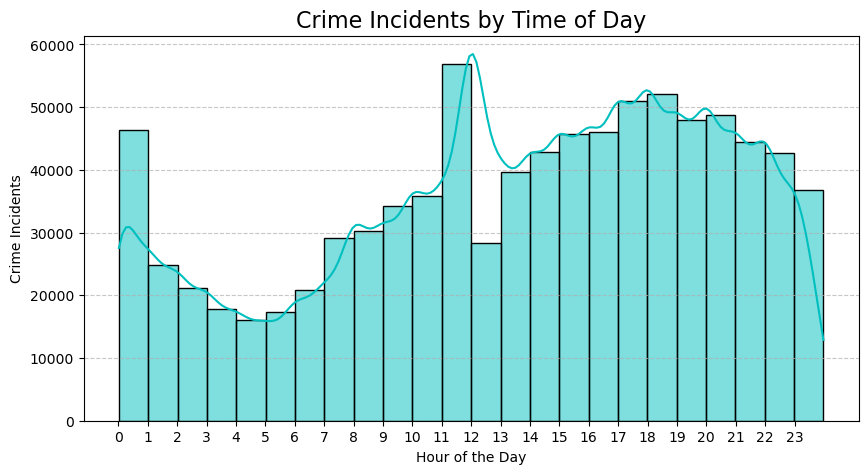

In [42]:
# convert TIME OCC from HHMM format to hours (e.g., 1530 → 15.5)

df["Hour"] = df["TIME OCC"] // 100 + (df["TIME OCC"] % 100) / 60


# plot histogram based on number of crime occurences and time of occurence 

plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(
    df["Hour"], 
    bins=24, 
    kde=True, 
    color="c")

plt.xlabel("Hour of the Day", fontsize=10)
plt.ylabel("Crime Incidents", fontsize=10)
plt.title("Crime Incidents by Time of Day", fontsize=16)
plt.xticks(range(0, 24)) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

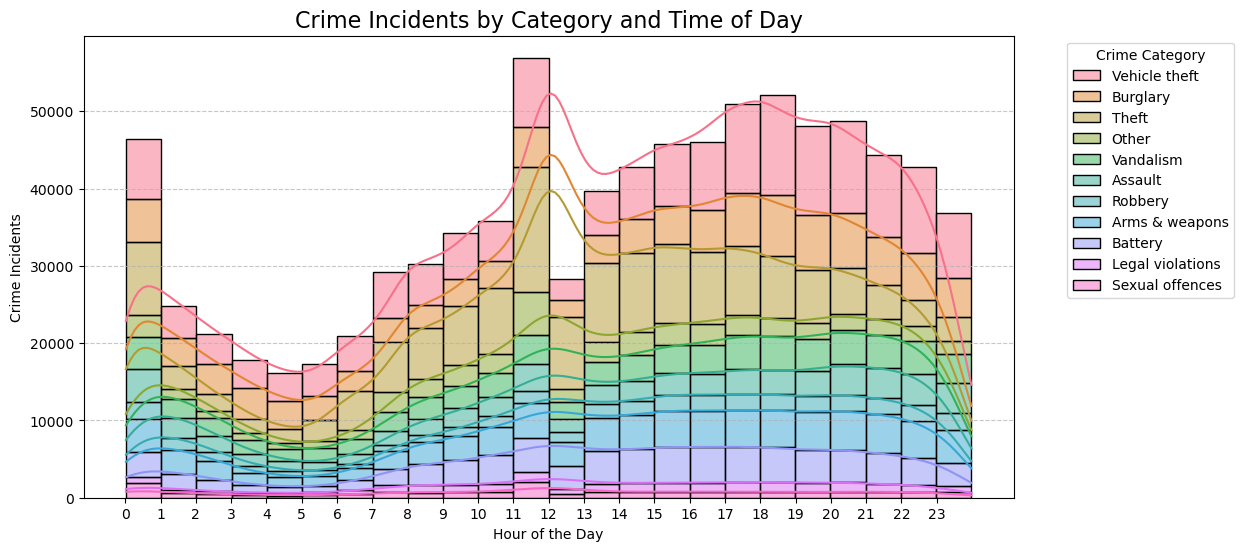

In [43]:
# plot histogram based on number of crime occurences and time of occurence split by crime categories

plt.figure(figsize=(12, 6), dpi=100)
ax = sns.histplot(
    df, x="Hour", 
    hue="Crime_Category_Grouped", 
    bins=24, 
    kde=True, 
    multiple="stack")

plt.xlabel("Hour of the Day", fontsize=10)
plt.ylabel("Crime Incidents", fontsize=10)
plt.title("Crime Incidents by Category and Time of Day", fontsize=16)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

if ax.legend_:
    ax.legend_.set_bbox_to_anchor((1.05, 1)) 
    ax.legend_.set_title("Crime Category")
plt.show()

From the histograms we can see that there are clearly peak times for crimes. 
- One such occurs around mid-day, between 11:00 and 12:00, after which the crime rate immediately drops. This peak appears to largely be due to an increase in thefts.
- Another significant peak can be detected at midnight, where thefts also make up the single biggest crime category during this hour.
- From the afternoon until early evening we can also see a steady increase in crimes, which then starts to drop again around 19:00. Vehicle thefts seem to increase in the evening hours, while regular theft is showing the opposite trend.